# import modules

In [1]:
import pandas as pd #to load and manipulate data for one-hot encoding
import numpy as np #to calculate the mean and standard deviation
import matplotlib.pyplot as plt #to draw graphs
from sklearn.tree import DecisionTreeClassifier  #to build classification tree
from sklearn.tree import plot_tree # to draw classification tree
from sklearn.model_selection import train_test_split #to split data into training and testing sets
from sklearn.model_selection import cross_val_score #for cross validation
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix #to draw a confusion matrix
 

In [2]:
df= pd.read_csv('processed.cleveland.data', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns=['age',
            'sex',
            'cp',
            'restbp',
            'chol',
            'fbs',
            'restecg',
            'thalach',
            'exang',
            'oldpeak',
            'slope',
            'ca',
            'thal',
            'hd' ]

In [5]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [6]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [7]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [8]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [9]:
len(df.loc[(df['ca']=='?')
      |
      (df['thal']=='?')])

6

In [10]:
len(df)

303

In [11]:
df.loc[(df['ca']=='?')
      |
      (df['thal']=='?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [12]:
df_1=df.loc[(df['ca'] !='?')
      &
      (df['thal']!='?')]

In [13]:
len(df_1)

297

In [14]:
df_1['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [15]:
df_1['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

# data split

In [16]:
x=df_1.drop('hd', axis=1).copy()

In [17]:
x.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [18]:
y=df_1['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

# one hot encoding


In [19]:
x.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [20]:
x['cp'].unique()

array([1., 4., 3., 2.])

In [21]:
x_encoded=pd.get_dummies(x, columns=['cp',
                          'restecg','slope','thal'])

In [22]:
x_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [23]:
y.unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [24]:
y_1=y>0
y[y_1]=1
y.unique()

array([0, 1], dtype=int64)

# build a preliminary classification tree

In [25]:
x_train, x_test, y_train, y_test=train_test_split(x_encoded,y,random_state=42)
clf=DecisionTreeClassifier(random_state=42)
clf_dt=clf.fit(x_train,y_train)

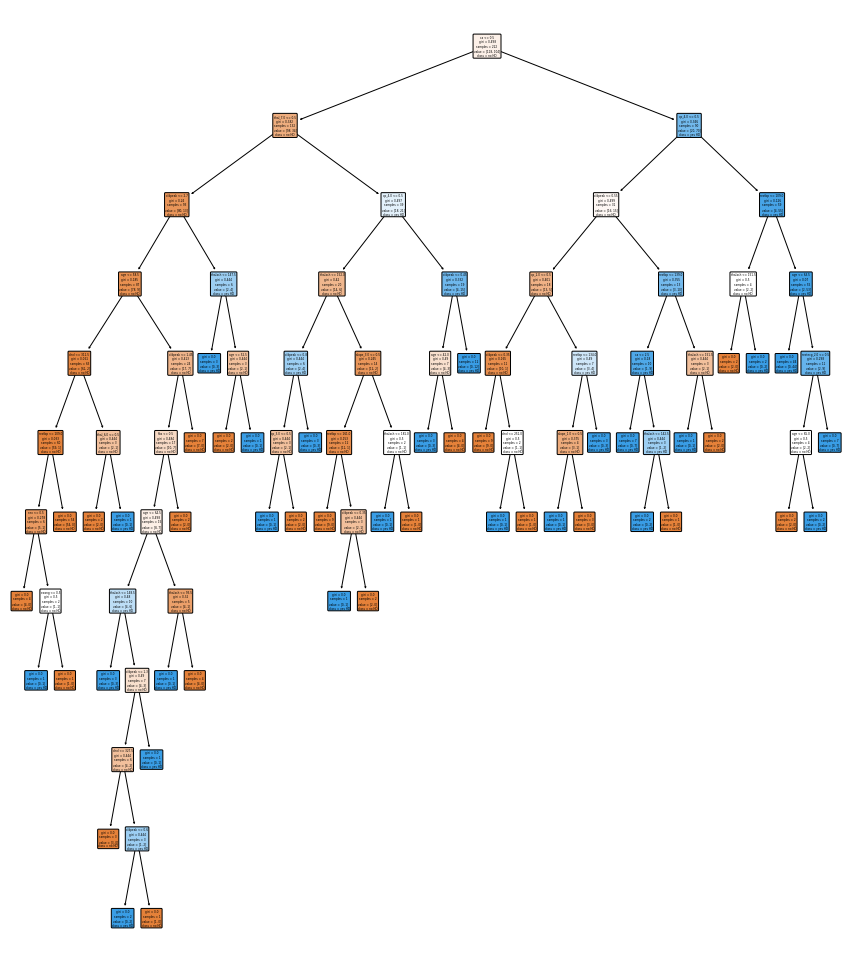

In [26]:
plt.figure(figsize=(15,17.5))
plot_tree(clf_dt, filled=True,
         rounded=True, class_names=["no HD", "yes HD"],
         feature_names=x_encoded.columns);

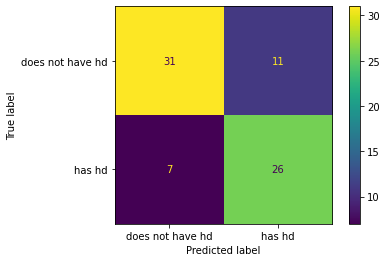

In [27]:
plot_confusion_matrix(clf_dt, x_test,y_test, display_labels=["does not have hd", "has hd"])

# cost complexity pruning part1: visualize alpha

In [35]:
path = clf_dt.cost_complexity_pruning_path(x_train, y_train)
alphas=path.ccp_alphas
alphas=alphas[:-1]

clf_dts=[]

for alpha in alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    clf_dt.fit(x_train, y_train)
    clf_dts.append(clf_dt)

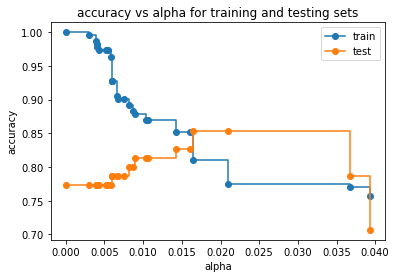

In [36]:
train_scores=[clf_dt.score(x_train,y_train) for clf_dt in clf_dts]
test_scores=[clf_dt.score(x_test,y_test) for clf_dt in clf_dts]

fig,ax=plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(alphas, train_scores, marker='o',label='train', drawstyle='steps-post')
ax.plot(alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

# complexity pruning part 2: cross validation for finding the best alpha

<AxesSubplot:xlabel='tree'>

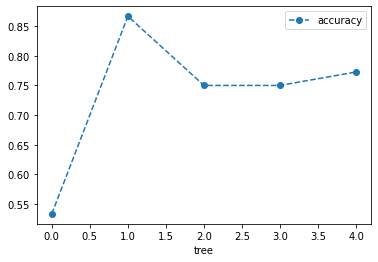

In [32]:
clf_dt=DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)
scores= cross_val_score(clf_dt, x_train, y_train,cv=5)
df=pd.DataFrame(data={'tree':range(5),'accuracy':scores})
df.plot(x='tree', y='accuracy', marker='o',linestyle='--')

<AxesSubplot:xlabel='alpha'>

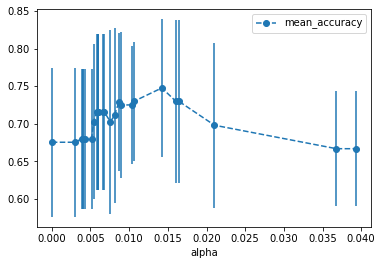

In [38]:
alpha_loop_values=[]
for alpha in alphas:
    clf_dt=DecisionTreeClassifier(random_state=0,ccp_alpha=alpha)
    scores=cross_val_score(clf_dt,x_train,y_train, cv=5)
    alpha_loop_values.append([alpha,np.mean(scores), np.std(scores)])
    
alpha_results=pd.DataFrame(alpha_loop_values,columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',
                  y='mean_accuracy',
                  yerr='std',
                  marker='o',
                  linestyle='--')

In [41]:
ideal_alpha=alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]['alpha']

In [42]:
ideal_alpha

20    0.014225
Name: alpha, dtype: float64

In [45]:
ideal_alpha=float(ideal_alpha)
ideal_alpha

0.014224751066856332

# building, evaluating,drawing and interpreting the final classification tree

In [46]:
pruned=DecisionTreeClassifier(random_state=42,ccp_alpha=ideal_alpha)
clf_pruned=pruned.fit(x_train,y_train)

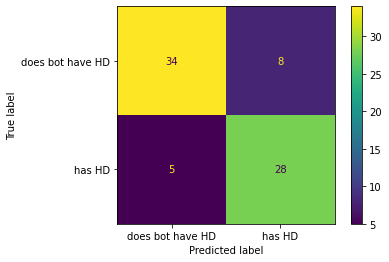

In [48]:
plot_confusion_matrix(clf_pruned,
                     x_test,
                     y_test,
                     display_labels=["does bot have HD", "has HD"])

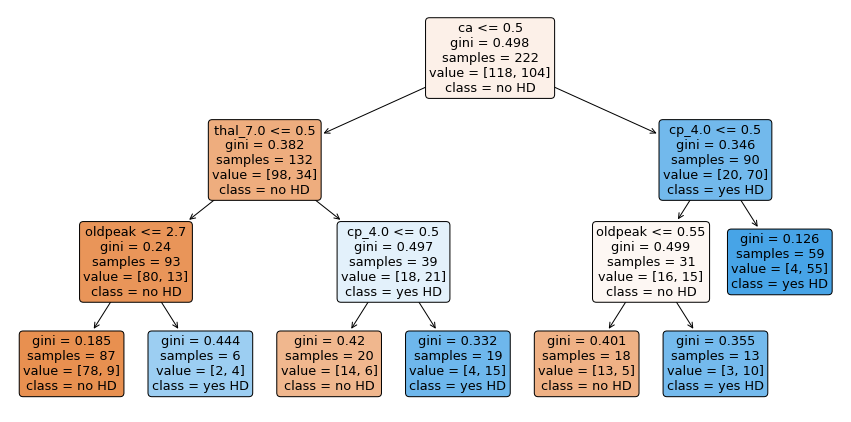

In [52]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_pruned,
         filled=True,
         rounded=True,
         class_names=['no HD', 'yes HD'],
         feature_names=x_encoded.columns);